me do this

In [1]:

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arunp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arunp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arunp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## preparing training Dataset

In [2]:
#merging data set
import pandas as pd

# Load first dataset (words with category 0-4)

df1 = pd.read_csv("file categora.csv") 
df1.columns = ["text", "category"]

# Mapping for dataset1 categories
dataset1_mapping = {
    0: "POLITICS",
    1: "SPORTS",
    2: "TECH",
    3: "ENTERTAINMENT",
    4: "BUSINESS"
}
df1["category"] = df1["category"].map(dataset1_mapping)

# Load second dataset (news articles)
df2 = pd.read_csv("news-article-categories.csv")
df2.columns = ["category", "title", "body"]

# Merge title and body into a single text field


df2["text"] = df2["title"] + " " + df2["body"]
df2 = df2[["category", "text"]]
'''>
# Get unique categories and assign numbers
all_categories = sorted(set(df1["category"]).union(set(df2["category"])))
category_mapping = {cat: idx for idx, cat in enumerate(all_categories)}

# Apply mapping
df1["category"] = df1["category"].map(category_mapping)
df2["category"] = df2["category"].map(category_mapping)
<'''
# Combine both datasets
final_dataset = pd.concat([df1, df2], ignore_index=True)


#unifing category
category_map = {
    'POLITICS': 'News & Current Affairs',
    'CRIME': 'News & Current Affairs',
    'RELIGION': 'News & Current Affairs',
    'ENVIRONMENT': 'News & Current Affairs',
    'MEDIA': 'News & Current Affairs', 

    'BUSINESS': 'Business & Finance',

    'SCIENCE': 'Science & Technology',
    'TECH': 'Science & Technology',

    'ARTS & CULTURE': 'Arts & Entertainment',
    'ENTERTAINMENT': 'Arts & Entertainment',
    'COMEDY': 'Arts & Entertainment',

    'EDUCATION': 'Education & Academia',

    'SPORTS': 'Sports',
}

final_dataset['category'] = final_dataset['category'].map(category_map)

final_dataset.dropna(subset=["category"],inplace=True)



# Save unified dataset
final_dataset.to_csv("unified_dataset.csv", index=False)

print("Unified dataset saved successfully!")


Unified dataset saved successfully!


## preprocess data

In [3]:
# Load dataset
df = pd.read_csv("unified_dataset.csv")

# Initialize tools
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Text cleaning function
def clean_text(text):
    text = text.lower()  # Lowercase
    tokens = word_tokenize(text)  # Tokenize before regex
    tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word.isalpha() and word not in stop_words
    ]
    tokens=[word for word in tokens if word not in {"u","even","day","last"'world', 'much', 'want', 'take', 'way', 'thing',
                                                    'make', 'think', 'good', 'could', 'come', 'made', 'right', 'back', 'go', 'first', 'well', 'see',
                                                    'still''big', 'point', 'put', 'last', 'world', 'life', 'since', 'change', 'every', 'number',
                                                    'country','going', 'work', 'american', 'week', 'end', 'three', 'set', 'look', 'part', 'state',
                                                    'give', 'help', 'need','never', 'show', 'home', 'long', 'city', 'next', 'another', 'something', 
                                                    'according', 'around', 'including','month', 'president''big', 'far', 'woman', 'lot', 'still', 
                                                    'keep', 'place', 'whether', 'national', 'face', 'news', 'however', 'york',
                                                    "said","year", "one","would","also","new","like","time","people","two","say","told","many",
                                                    "know","may","mr","get",}]
    return " ".join(tokens)

# Apply text cleaning
df["text"] = df["text"].astype(str).apply(clean_text)

In [4]:
df.sort_values(["category","text"],inplace=True)

In [6]:
df[:10]

,text,category
1399,aaliyah claim dismissed court late r b star aa...,Arts & Entertainment
3221,abandoned house entirely filled flower imagine...,Arts & Entertainment
1609,abba queen enters music rich list behind abba ...,Arts & Entertainment
5194,abba release music gim gim gim abba reunion le...,Arts & Entertainment
1338,abba reunite musical premiere original star sw...,Arts & Entertainment
1395,academy award flourished annual academy award ...,Arts & Entertainment
2535,acclaimed horror comic artist bernie wrightson...,Arts & Entertainment
2538,acclaimed poet playwright derek walcott dead n...,Arts & Entertainment
2609,activist artist dread scott revolution activis...,Arts & Entertainment
2317,activist artist light trump hotel putin monday...,Arts & Entertainment


Class Distribution:
News & Current Affairs    2567
Arts & Entertainment      2269
Science & Technology      1252
Sports                    1012
Business & Finance        1011
Education & Academia       490
Name: category, dtype: int64


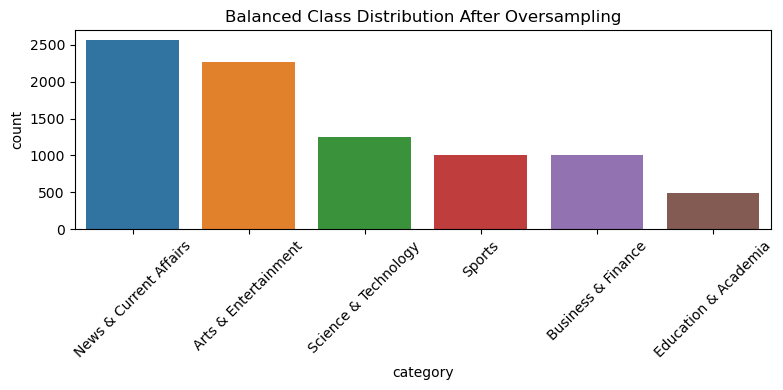

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# Text summary
print("Class Distribution:")
print(df['category'].value_counts())

# Plot bar chart
plt.figure(figsize=(8, 4))
sns.countplot(x='category', data=df, order=df['category'].value_counts().index)
plt.title("Balanced Class Distribution After Oversampling")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

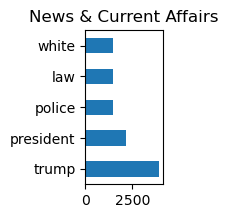

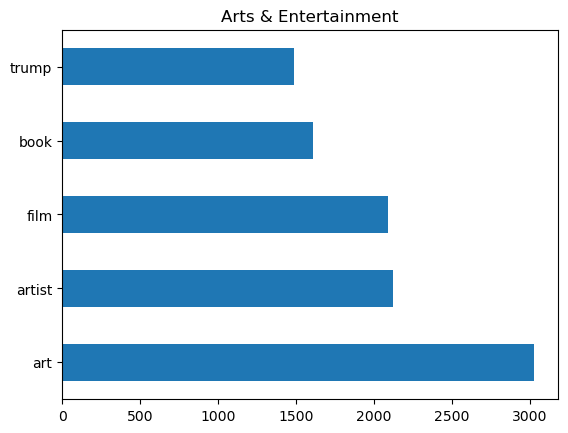

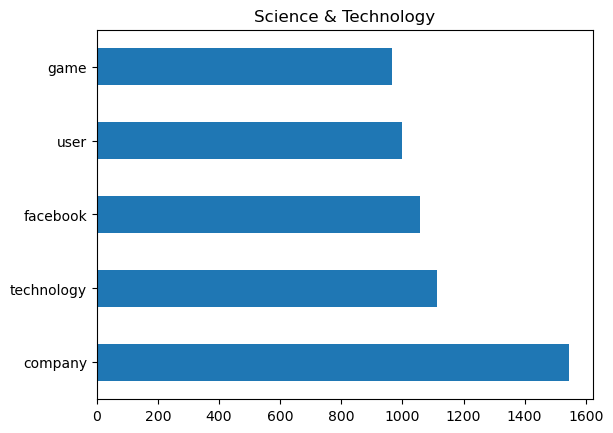

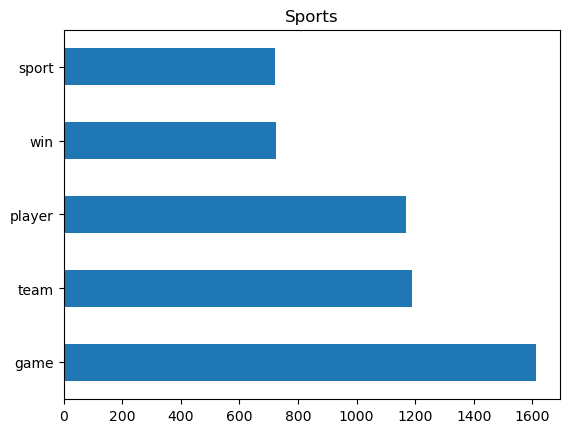

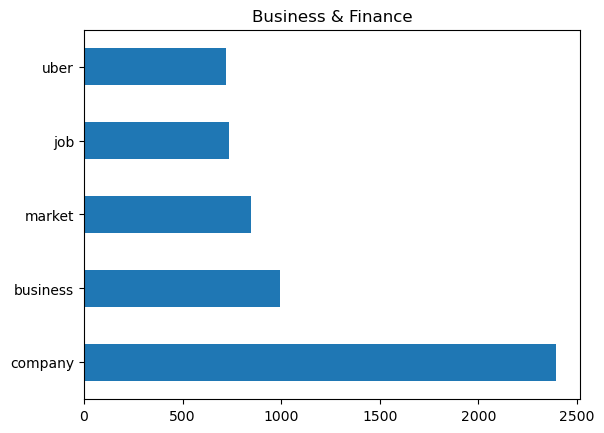

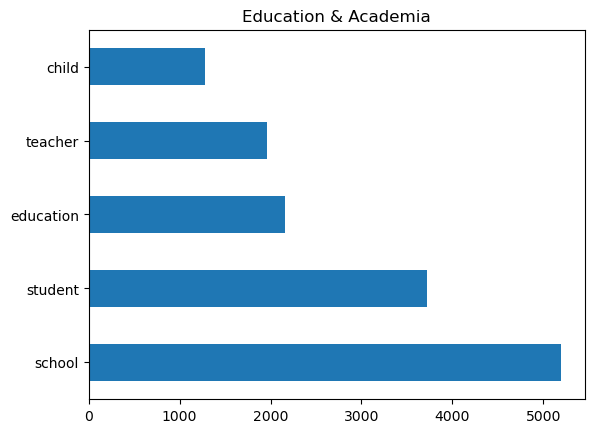

In [6]:
plt.figure(figsize=(1,2))
import matplotlib.pyplot as plt
labels = df.category.value_counts().index
for cat in df.category.value_counts().index:
    a=pd.Series(''.join(df[df["category"]==cat]["text"]).split()).value_counts()[:5]
    df.loc[df["category"] == cat, "identifiers"] = ",".join(map(str, a.index.tolist()))
    a.plot(kind='barh',title=cat)
    plt.show()

## Vectorizer,spliting train test data , oversampling data to balance data

In [7]:
# Converting the text data into vectors using TF-IDF
# Generating 1000 features for the input for the model
tfidfconverter = TfidfVectorizer(max_features=1000, stop_words=stopwords.words('english')) 
X = pd.DataFrame(tfidfconverter.fit_transform(df['text']).toarray())
#print(X[:5])
#X.columns = range(X.shape[1])
labelencoder = LabelEncoder() #Converting the labels to numeric labels
y = labelencoder.fit_transform(df['category'])
import pickle

pickle.dump(tfidfconverter,open("models/tfidfconverter.pkl","wb"))

In [8]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)  

Balanced Class Distribution:
0    2567
1    2567
2    2567
3    2567
4    2567
5    2567
Name: category, dtype: int64


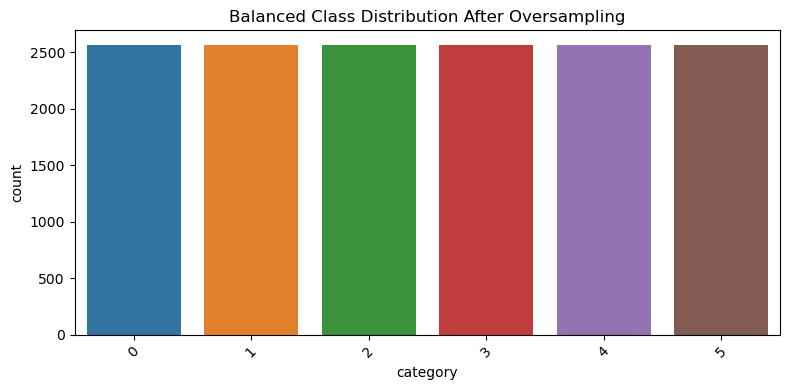

In [10]:

# Convert to a DataFrame for easier visualization
df_balanced = pd.DataFrame(X_resampled)
df_balanced['category'] = y_resampled  # append target

# Text summary
print("Balanced Class Distribution:")
print(df_balanced['category'].value_counts())

# Plot bar chart
plt.figure(figsize=(8, 4))
sns.countplot(x='category', data=df_balanced, order=df_balanced['category'].value_counts().index)
plt.title("Balanced Class Distribution After Oversampling")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# smote
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)  

#ADASYN
from imblearn.over_sampling import ADASYN
sampling=ADASYN(sampling_strategy="minority")
X_resampled, y_resampled = sampling.fit_resample(X, y)

import numpy as np
unique, counts = np.unique(y_resampled, return_counts=True)
print(np.asarray((unique, counts)).T)

## SVM

In [11]:
from sklearn.svm import SVC
svm_model = SVC(kernel="linear", probability=True)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

Accuracy: 0.9139889646218761
                        precision    recall  f1-score   support

News & Current Affairs       0.88      0.90      0.89       504
  Arts & Entertainment       0.90      0.91      0.91       491
  Science & Technology       0.96      1.00      0.98       509
                Sports       0.86      0.80      0.83       537
    Business & Finance       0.91      0.92      0.91       541
  Education & Academia       0.97      0.97      0.97       499

              accuracy                           0.91      3081
             macro avg       0.91      0.92      0.91      3081
          weighted avg       0.91      0.91      0.91      3081

Confusion matrix:
 [[454   2   4  28  10   6]
 [  5 446   1  23  15   1]
 [  1   0 508   0   0   0]
 [ 37  30  12 428  24   6]
 [ 12  16   4  11 496   2]
 [  5   0   1   8   1 484]]


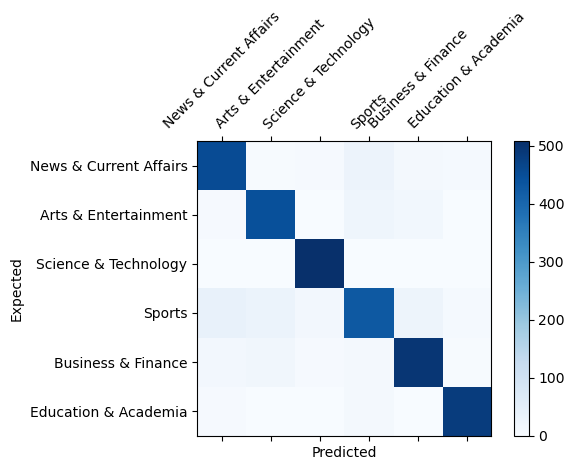

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Accuracy: %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred,target_names=labels)) 

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the confusion matrix
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Set tick positions and labels
ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45)
ax.set_yticklabels(labels)

# Axis labels
plt.xlabel('Predicted')
plt.ylabel('Expected')

plt.tight_layout()
plt.show()

In [13]:
import pickle
pickle.dump(svm_model, open('models/svm_model.pkl','wb'))

## ADABOOST

In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=15),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)

Accuracy: 0.9055501460564752
                        precision    recall  f1-score   support

News & Current Affairs       0.84      0.78      0.81       504
  Arts & Entertainment       0.95      0.96      0.96       491
  Science & Technology       0.98      1.00      0.99       509
                Sports       0.75      0.79      0.77       537
    Business & Finance       0.94      0.93      0.94       541
  Education & Academia       0.99      0.98      0.98       499

              accuracy                           0.91      3081
             macro avg       0.91      0.91      0.91      3081
          weighted avg       0.91      0.91      0.91      3081

Confusion matrix:
 [[393   4   2 100   2   3]
 [  0 472   0  11   7   1]
 [  0   0 509   0   0   0]
 [ 62  17  11 422  22   3]
 [  6   3   0  28 504   0]
 [  6   0   0   3   0 490]]


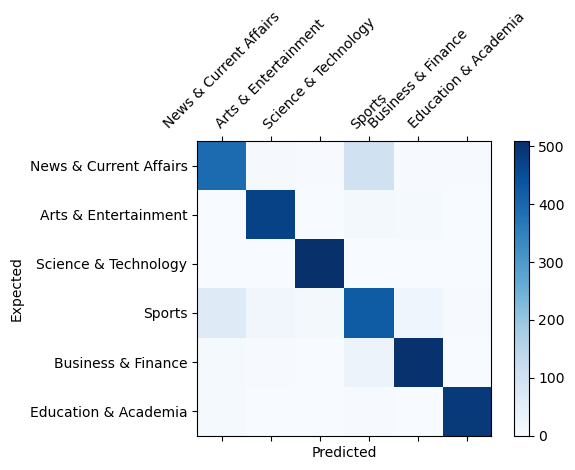

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Accuracy: %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred,target_names=labels)) 
#print(confusion_matrix(y_test,y_pred)) 

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the confusion matrix
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Set tick positions and labels
ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45)
ax.set_yticklabels(labels)

# Axis labels
plt.xlabel('Predicted')
plt.ylabel('Expected')

plt.tight_layout()
plt.show()

In [16]:
pickle.dump(ada_model, open('models/ada_model.pkl','wb'))

## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1200, random_state=1)  #defining 1000 nodes 
rf = classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test) 

In [18]:
print()

Accuracy: 0.9292437520285621
                        precision    recall  f1-score   support

News & Current Affairs       0.91      0.91      0.91       504
  Arts & Entertainment       0.94      0.97      0.95       491
  Science & Technology       0.97      1.00      0.98       509
                Sports       0.92      0.76      0.83       537
    Business & Finance       0.90      0.95      0.93       541
  Education & Academia       0.94      0.99      0.96       499

              accuracy                           0.93      3081
             macro avg       0.93      0.93      0.93      3081
          weighted avg       0.93      0.93      0.93      3081

Confusion matrix:
 [[459   3   4  21   7  10]
 [  0 476   0   6   8   1]
 [  0   0 509   0   0   0]
 [ 39  24  12 409  40  13]
 [  5   3   1   8 516   8]
 [  4   0   0   1   0 494]]


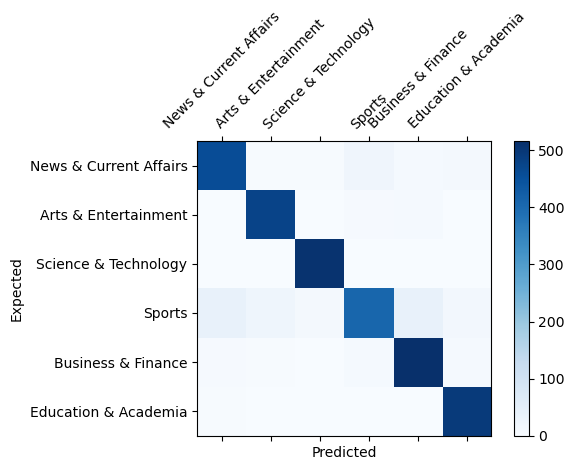

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Accuracy: %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred,target_names=labels)) 
#print(confusion_matrix(y_test,y_pred)) 

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the confusion matrix
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Set tick positions and labels
ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45)
ax.set_yticklabels(labels)

# Axis labels
plt.xlabel('Predicted')
plt.ylabel('Expected')

plt.tight_layout()
plt.show()


In [20]:
import pickle
import requests
import json
pickle.dump(rf, open('models/rfmodel.pkl','wb'))

## Naive Bayes Classifier

Accuracy: 0.8474521259331386
                        precision    recall  f1-score   support

News & Current Affairs       0.82      0.87      0.85       504
  Arts & Entertainment       0.82      0.81      0.81       491
  Science & Technology       0.88      0.93      0.90       509
                Sports       0.77      0.72      0.75       537
    Business & Finance       0.85      0.83      0.84       541
  Education & Academia       0.95      0.93      0.94       499

              accuracy                           0.85      3081
             macro avg       0.85      0.85      0.85      3081
          weighted avg       0.85      0.85      0.85      3081

Confusion matrix:
 [[439   7   8  34   7   9]
 [  9 396  27  31  26   2]
 [  6  10 471  13   5   4]
 [ 45  37  22 389  40   4]
 [ 20  34   8  21 451   7]
 [ 16   1   1  16   0 465]]


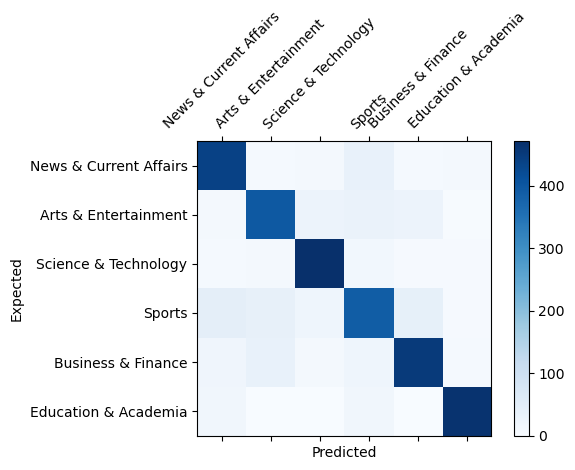

In [21]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Accuracy: %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=labels))

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the confusion matrix
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Set tick positions and labels
ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45)
ax.set_yticklabels(labels)

# Axis labels
plt.xlabel('Predicted')
plt.ylabel('Expected')

plt.tight_layout()
plt.show()


In [22]:
pickle.dump(clf, open('models/nbmodel.pkl','wb'))

## XGBoost

Accuracy: 0.9373580006491399
                        precision    recall  f1-score   support

News & Current Affairs       0.90      0.90      0.90       504
  Arts & Entertainment       0.95      0.99      0.97       491
  Science & Technology       0.97      1.00      0.98       509
                Sports       0.91      0.80      0.85       537
    Business & Finance       0.92      0.96      0.94       541
  Education & Academia       0.97      0.99      0.98       499

              accuracy                           0.94      3081
             macro avg       0.94      0.94      0.94      3081
          weighted avg       0.94      0.94      0.94      3081

Confusion matrix:
 [[452   3   6  33   7   3]
 [  0 484   1   2   3   1]
 [  0   0 509   0   0   0]
 [ 37  16  10 430  35   9]
 [  9   4   1   6 519   2]
 [  3   0   0   2   0 494]]


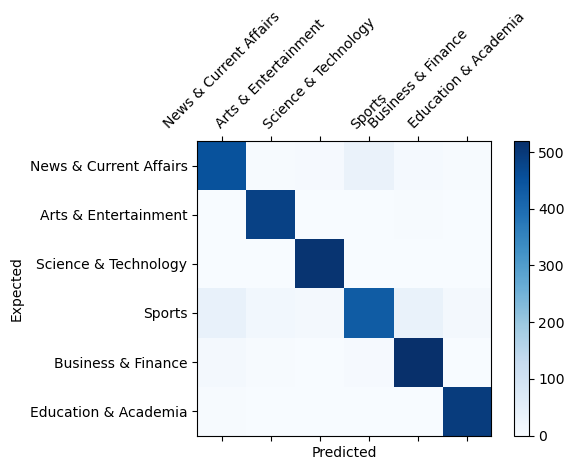

In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %s" % (accuracy))
print(classification_report(y_test, y_pred,target_names=labels))

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the confusion matrix
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Set tick positions and labels
ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45)
ax.set_yticklabels(labels)

# Axis labels
plt.xlabel('Predicted')
plt.ylabel('Expected')

plt.tight_layout()
plt.show()

In [24]:
pickle.dump(xgb, open('models/xgbmodel.pkl','wb'))

## W2V

In [25]:
import gensim
from gensim.models import Word2Vec
wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True) # Pre-trained word vectors
wv.fill_norms()
#wv.save("GoogleNews-vectors.kv")

df[:5]

In [26]:
# Defining function to assign vectors from pre-trained model
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.key_to_index:
            mean.append(wv.get_vector(word, norm=True))
            all_words.add(wv.key_to_index[word])

    if not mean:
        return np.zeros(wv.vector_size, dtype=np.float32)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [27]:
#function to split indiviual words from the sentences
import numpy as np
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2 or len(word) > 12:
                continue
            tokens.append(word)
    return tokens

import nltk
train, test = train_test_split(df, test_size=0.3, random_state = 42)
test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['text']), axis=1).values
label_test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['category']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['text']), axis=1).values

In [28]:
import nltk
train, test = train_test_split(df, test_size=0.3, random_state = 42)
X_train = train['text']
y_train = train['category']
X_resampled, y_resampled = ros.fit_resample(X_train.values.reshape(-1, 1), y_train)
X_resampled = pd.Series(X_resampled.flatten())
y_resampled = pd.Series(y_resampled)
train_tokenized = X_resampled.apply(w2v_tokenize_text).values
label_train_tokenized = y_resampled.apply(w2v_tokenize_text).values
test_tokenized = test['text'].apply(w2v_tokenize_text).values
label_test_tokenized = test['category'].apply(w2v_tokenize_text).values 

In [29]:
X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)
y_test_word_average = word_averaging_list(wv,label_test_tokenized)

In [30]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5,max_iter=10000,class_weight='balanced')
#logreg = logreg.fit(X_train_word_average, train['category'])
logreg = logreg.fit(X_train_word_average, y_resampled)
y_pred = logreg.predict(X_test_word_average)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
print('accuracy %s' % accuracy_score(y_pred, test.category))
print(classification_report(test.category, y_pred,target_names=labels))

accuracy 0.8237117396358
                        precision    recall  f1-score   support

News & Current Affairs       0.89      0.88      0.88       711
  Arts & Entertainment       0.70      0.75      0.72       302
  Science & Technology       0.66      0.78      0.71       127
                Sports       0.84      0.79      0.81       791
    Business & Finance       0.77      0.81      0.79       354
  Education & Academia       0.91      0.91      0.91       296

              accuracy                           0.82      2581
             macro avg       0.79      0.82      0.81      2581
          weighted avg       0.83      0.82      0.82      2581



Accuracy: 0.8237117396358
                        precision    recall  f1-score   support

News & Current Affairs       0.89      0.88      0.88       711
  Arts & Entertainment       0.70      0.75      0.72       302
  Science & Technology       0.66      0.78      0.71       127
                Sports       0.84      0.79      0.81       791
    Business & Finance       0.77      0.81      0.79       354
  Education & Academia       0.91      0.91      0.91       296

              accuracy                           0.82      2581
             macro avg       0.79      0.82      0.81      2581
          weighted avg       0.83      0.82      0.82      2581

Confusion matrix:
 [[623  10  13  42  18   5]
 [  8 226   9  30  27   2]
 [  5   7  99  12   2   2]
 [ 49  45  23 622  35  17]
 [  9  32   5  19 287   2]
 [  8   3   2  12   2 269]]


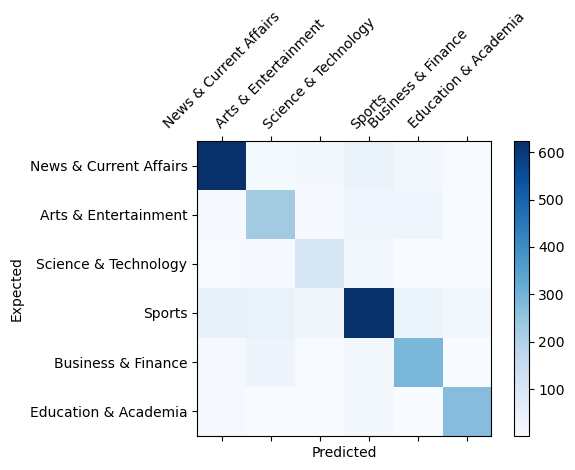

In [32]:
print('Accuracy: %s' % accuracy_score(y_pred,test.category))
print(classification_report(test.category, y_pred,target_names=labels))

conf_mat = confusion_matrix(y_true=test.category, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the confusion matrix
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Set tick positions and labels
ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45)
ax.set_yticklabels(labels)

# Axis labels
plt.xlabel('Predicted')
plt.ylabel('Expected')

plt.tight_layout()
plt.show()


In [33]:
pickle.dump(logreg, open('models/w2vmodel.pkl','wb'))

## Doc2Vec Model

In [34]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import doc2vec
from sklearn import utils
import gensim
import re


In [35]:
def label_sentences(corpus, label_type):
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(doc2vec.TaggedDocument(v.split(), [label]))
    return labeled

In [36]:
LabeledSentence = TaggedDocument
X_train, X_test, y_train, y_test = train_test_split(df.text, df.category, random_state=2, test_size=0.3)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [37]:
X_train[2:4]

[TaggedDocument(words=['story', 'brown', 'eye', 'gazing', 'mine', 'taking', 'four', 'table', 'greeting', 'smile', 'recognition', 'chatting', 'briefly', 'group', 'regular', 'spoken', 'dozen', 'least', 'taken', 'order', 'happy', 'hour', 'admit', 'night', 'saw', 'eye', 'actually', 'stop', 'looking', 'framed', 'corner', 'tiny', 'laugh', 'line', 'eye', 'hinted', 'earthy', 'warmth', 'worldly', 'sincerity', 'sneaking', 'discreet', 'glance', 'talking', 'friend', 'brown', 'eye', 'looked', 'mine', 'asked', 'throat', 'froze', 'awkward', 'moment', 'thinking', 'sit', 'repeat', 'special', 'read', 'phone', 'book', 'recite', 'gettysburg', 'address', 'managed', 'ugh', 'nacho', 'night', 'idea', 'person', 'countercultural', 'figure', 'high', 'school', 'graduated', 'summa', 'cum', 'laude', 'university', 'georgia', 'walked', 'away', 'successful', 'career', 'teaching', 'high', 'school', 'student', 'search', 'glimpsed', 'compelling', 'mystery', 'brown', 'eye', 'later', 'agree', 'married', 'eye', 'road', 'wif

In [38]:
model_dbow = Doc2Vec(vector_size=300)
model_dbow.build_vocab([x for x in tqdm(all_data)])

100%|██████████████████████████████████████████████████████████████████████████| 8601/8601 [00:00<00:00, 592708.60it/s]


In [39]:
for epoch in range(45):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha
model_dbow.save("models/doc2vec_dbow.model")

100%|█████████████████████████████████████████████████████████████████████████| 8601/8601 [00:00<00:00, 3281055.82it/s]


In [40]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.dv[prefix]
    return vectors

In [41]:
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [42]:
logreg = LogisticRegression(max_iter=10000,class_weight='balanced')
logreg.fit(train_vectors_dbow, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

In [43]:
logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)

Accuracy: 0.8322355676094537
                        precision    recall  f1-score   support

News & Current Affairs       0.85      0.88      0.87       693
  Arts & Entertainment       0.75      0.85      0.80       314
  Science & Technology       0.71      0.87      0.78       137
                Sports       0.87      0.72      0.79       756
    Business & Finance       0.79      0.84      0.81       363
  Education & Academia       0.92      0.96      0.94       318

              accuracy                           0.83      2581
             macro avg       0.81      0.85      0.83      2581
          weighted avg       0.84      0.83      0.83      2581

Confusion matrix:
 [[607  10   7  44  17   8]
 [  5 267   5  12  22   3]
 [  5   3 119   4   4   2]
 [ 75  56  31 546  37  11]
 [ 12  18   5  22 304   2]
 [  6   1   1   2   3 305]]


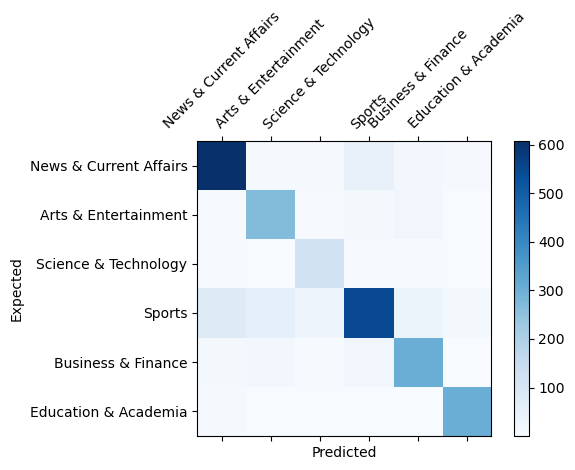

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %s" % (accuracy))
print(classification_report(y_test, y_pred,target_names=labels))

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the confusion matrix
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Set tick positions and labels
ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45)
ax.set_yticklabels(labels)

# Axis labels
plt.xlabel('Predicted')
plt.ylabel('Expected')

plt.tight_layout()
plt.show()

In [45]:
pickle.dump(logreg, open('models/d2vmodel.pkl','wb'))

import pickle
import os
import textract
import fitz  # PyMuPDF
from docx import Document
import pandas as pd
from bs4 import BeautifulSoup
from PIL import Image
import pytesseract
from gensim.models import KeyedVectors
from gensim.models import Doc2Vec
import numpy as np
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

svm_model=pickle.load(open('models/svm_model.pkl','rb'))
ada_model= pickle.load(open('models/ada_model.pkl','rb'))
rfmodel= pickle.load(open('models/rfmodel.pkl','rb'))
xgmodel= pickle.load(open('models/xgbmodel.pkl','rb'))
nbmodel= pickle.load(open('models/nbmodel.pkl','rb'))
w2vmodel= pickle.load(open('models/w2vmodel.pkl','rb'))
d2vmodel= pickle.load(open('models/d2vmodel.pkl','rb'))
tfidfconverter=pickle.load(open("models/tfidfconverter.pkl","rb"))
model_dbow = Doc2Vec.load("models/doc2vec_dbow.model")
wv = KeyedVectors.load("GoogleNews-vectors.kv")
testfile="buisness.png"

def extract_text_from_file(file_path):
    _, ext = os.path.splitext(file_path)
    ext = ext.lower()

    try:
        if ext == '.pdf':
            doc = fitz.open(file_path)
            text = ""
            for page in doc:
                page_text = page.get_text()
                if not page_text.strip():
                    # Try OCR if page appears to be image-only
                    pix = page.get_pixmap(dpi=300)
                    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
                    page_text = pytesseract.image_to_string(img)
                text += page_text + "\n"
            return text

        elif ext == '.docx':
            doc = Document(file_path)
            return "\n".join(para.text for para in doc.paragraphs)

        elif ext in ['.xls', '.xlsx']:
            df = pd.read_excel(file_path, dtype=str)
            return df.apply(" ".join, axis=1).str.cat(sep="\n")

        elif ext == '.txt':
            with open(file_path, 'r', encoding='utf-8') as f:
                return f.read()

        elif ext in ['.html', '.htm']:
            with open(file_path, 'r', encoding='utf-8') as f:
                soup = BeautifulSoup(f, 'html.parser')
                return soup.get_text()

        elif ext in ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']:
            img = Image.open(file_path)
            return pytesseract.image_to_string(img)

        else:
            # fallback to textract for unsupported formats
            text = textract.process(file_path)
            return text.decode('utf-8')

    except Exception as e:
        return f"Error reading file {file_path}: {e}"

text = extract_text_from_file(testfile)
tdf=pd.DataFrame([text], columns = ['data'])
tdf["text"] = tdf['data'].astype(str).apply(clean_text)
inputs = pd.DataFrame(tfidfconverter.transform(tdf['data']).toarray())
#print(inputs[:5])

output = [rfmodel.predict(inputs),nbmodel.predict(inputs),xgmodel.predict(inputs),svm_model.predict(inputs),ada_model.predict(inputs)]
#output = (labelencoder.inverse_transform((output)))
print(f"rf model - {labelencoder.inverse_transform((output[0]))} \n nbmodel - {labelencoder.inverse_transform((output[1]))} \n xgbmodel - {labelencoder.inverse_transform((output[2]))} \n svm model - {labelencoder.inverse_transform((output[3]))} , \n ada model - {labelencoder.inverse_transform((output[4]))}")

print(labels)

    b=pd.Series(''.join(tdf["text"]).split()).value_counts()[:10]
    print(b.index.tolist())

    a=pd.Series(''.join(df[df["category"]=='SPORTS']["text"]).split()).value_counts()[:10]
    print(a.index.tolist())

# input for w2v

text= clean_text(text)
new_tokens = w2v_tokenize_text(text)
input_vector = word_averaging_list(wv, [new_tokens])
output=w2vmodel.predict(input_vector)
print(f"w2v - {output}")

# input for d2v

In [46]:


def infer_vector(text, model):
    cleaned_text = clean_text(text)  # Use same cleaning as training
    tokens = cleaned_text.split()
    return model.infer_vector(tokens)

input_text = "FIfa"
input_vector = infer_vector(input_text, model_dbow).reshape(1, -1)

# Predict using the trained model
predicted_category = logreg.predict(input_vector)
print(f"d2v - {predicted_category}")



d2v - ['Arts & Entertainment']


text